In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy 

import seaborn as sns
from IPython.display import Markdown as md

In [25]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

grid_point = np.arange(1., 311.)
bw = 7.
kernel_type = 'gaussian_poly2'
contam_weight = 1e-3
plot_domain = (1., 310.)
plot_pts_cnt = 3000

contam_data_list = [20., 120.]
contam_data_list = [150., 200.]

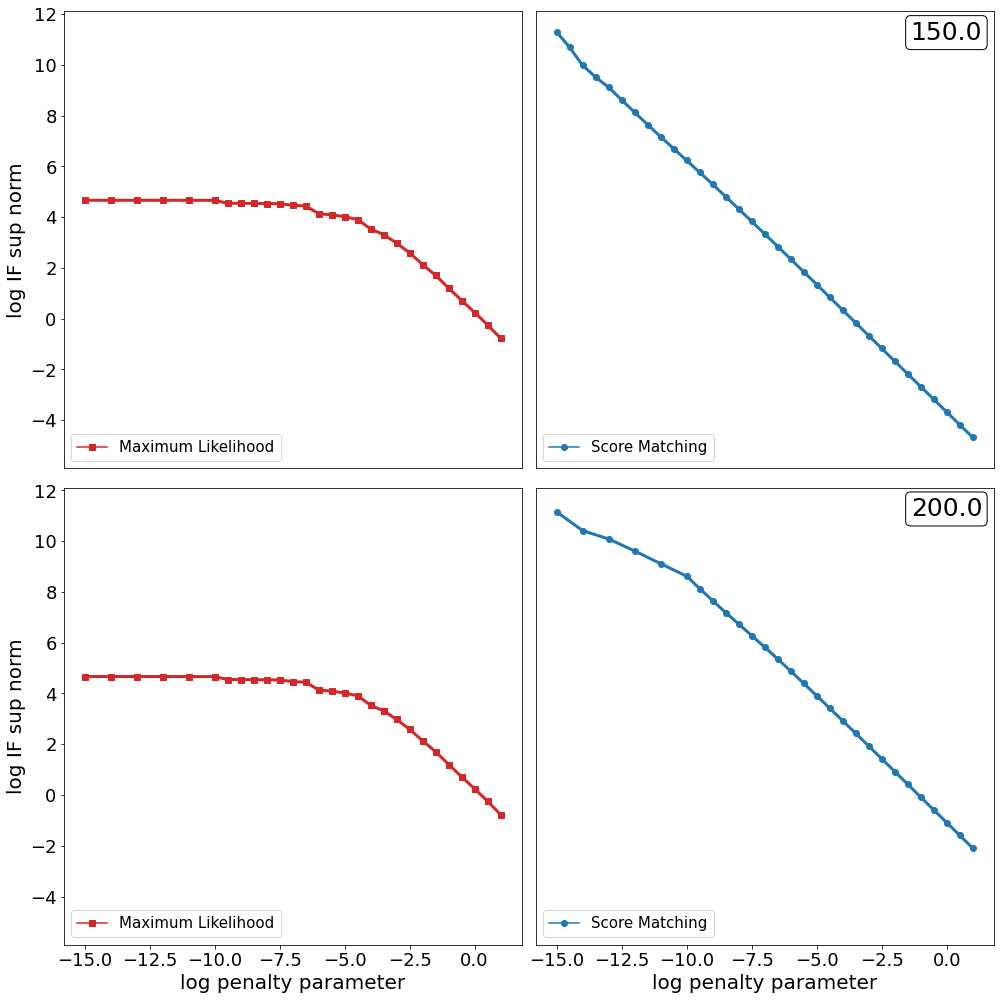

In [26]:
fig = plt.figure(constrained_layout=False)
fig.set_figheight(14)
fig.set_figwidth(14)
ncols = 2
nrows = 2

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
legend_fontsize = 15
linewidth = 3.0
x_label = 'log penalty parameter'
y_label = 'log IF sup norm'
ylimit = (-5.9, 12.1)

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
        
    ax = fig.add_subplot(spec[i, 0])
    contam_data = contam_data_list[i]

    summary_df_ml = pd.read_excel(f'data/bw={bw}-kernel={kernel_type}-contamweight={contam_weight}-summary.xlsx', 
                                  f'ML-{int(contam_data)}')
    ax.plot(summary_df_ml['log-lambda'], np.log(summary_df_ml.IF_supnorm), 
            color = 'tab:red', linestyle = 'solid', linewidth = linewidth)
    plt.plot(summary_df_ml['log-lambda'], np.log(summary_df_ml.IF_supnorm), 
             color = 'tab:red', marker = 's', label = 'Maximum Likelihood')
    ax.legend(loc = 'lower left', fontsize = legend_fontsize)
    plt.ylim(ylimit)
    ax.set_ylabel(y_label, fontsize = label_fontsize)

    if i == nrows - 1: 
        ax.set_xlabel(x_label, fontsize = label_fontsize)
    else: 
        ax.set_xticks([])
        
    ax.tick_params(axis = 'both', labelsize = tick_fontsize)
    
    
    ax = fig.add_subplot(spec[i, 1])
    summary_df_sm = pd.read_excel(f'data/bw={bw}-kernel={kernel_type}-contamweight={contam_weight}-summary.xlsx', 
                                  f'SM-{int(contam_data)}')
    ax.plot(summary_df_sm['log-lambda'], np.log(summary_df_sm.IF_supnorm), 
            color = 'tab:blue', linestyle = 'solid', linewidth = linewidth)
    plt.plot(summary_df_sm['log-lambda'], np.log(summary_df_sm.IF_supnorm), 
             color = 'tab:blue', marker = 'o', label = 'Score Matching')    
    
    plt.legend(loc = 'lower left', fontsize = legend_fontsize)
    plt.ylim(ylimit)
    ax.set_yticks([])

    if i == nrows - 1: 
        ax.set_xlabel(x_label, fontsize = label_fontsize)
    else: 
        ax.set_xticks([])
    
    ax.tick_params(axis = 'both', labelsize = tick_fontsize)

    info = r"{add_obs}".format(add_obs = contam_data)
    ax.text(0.975, 0.98,
            info,
            fontsize = info_fontsize,
            multialignment = 'left',
            horizontalalignment = 'right',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig(f'plots/PenSM-PenML-geyser-waiting-logdensity-IF-supnorm-penaltyparameter-bw={bw}-2.pdf')

In [ ]:
contam_data_array = np.array([10., 20.,  30.,  40.,  50.,  60.,  70.,  80.,
                              90., 100., 150., 200., 250., 300., 350., 400.]).reshape(-1, 1)
grid_points = np.arange(1., 411., 2)
seed = 0

bw_list = [5., 7., 9.]
pen_param_list = np.arange(-13., 1.)
kernel_type = 'gaussian_poly2'


In [ ]:
stepsize_pd = pd.DataFrame(
    {'bw': [5.0] * len(pen_param_list) + [7.0] * len(pen_param_list) + [9.0] * len(pen_param_list), 
     'logpen': pen_param_list.tolist() * 3, 
     'stepsize': [1., 1., 1., 1., 0.8, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 
                  0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1, 
                  0.7, 0.7, 0.7, 0.7, 0.6, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]}
)
stepsize_pd

In [ ]:
start_grid_points = np.arange(1., 411., 2)
grid_points_gram_mat = 

In [ ]:
output_pd = pd.DataFrame()

for bw in bw_list: 
    
    for pen_param in pen_param_list: 
        
        step_size = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == pen_param)].loc[:, 'stepsize'].item()
        
        sup_norm = {}
        
        sup_norm['bw'] = [bw] * len(contam_data_array)
        sup_norm['loglambda'] = [pen_param] * len(contam_data_array)
        sup_norm['contam_data'] = contam_data_array.flatten()
        sup_norm['IFsupnorm_ML'] = []
        sup_norm['IFsupnorm_SM'] = []
        
        sup_norm['natparam_norm_ML'] = []
        sup_norm['natparam_norm_SM'] = []
        
        save_dir_ml = (f'data/PenML-FixContamData-VaryLambda-basisn={len(grid_points)}-bw={bw}-' + 
                       f'kernel={kernel_type}-loglambda={pen_param}-contamweight=0.01-' + 
                       f'plotdomain=(1.0, 410.0)-plotcnts=3000-abstol=0.05-stepsize={step_size}-seed={seed}')
        
        save_dir_sm = (f'data/SM-FixContamData-VaryLambda-bw={bw}-kernel={kernel_type}-loglambda={pen_param}-' + 
                       f'contamweight=0.01-plotdomain=(1.0, 410.0)-plotcnts=3000')
        
        for contam_data in contam_data_array: 
            
            sub_df_ml = np.load(save_dir_ml + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm_ML'].append(np.max(np.abs(sub_df_ml)))
            
            coef_ml = np.load(save_dir_ml + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            natparam_norm = 
            
            
            
            sub_df_sm = np.load(save_dir_sm + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm_SM'].append(np.max(np.abs(sub_df_sm)))
                
        output_pd = pd.concat([output_pd, pd.DataFrame(sup_norm)])

output_pd

In [ ]:
output_pd.to_csv('data/fixContamdata-varyLambda-sup-norm.csv')

In [ ]:
# contam_data_plot_array = [20., 40., 60., 80., 
#                           100., 200., 300., 400.]
contam_data = 400.

# output_pd = pd.read_csv(f'data/fixContamdata-varyLambda-sup-norm.csv')
fig = plt.figure(constrained_layout=False)
fig.set_figheight(7)
fig.set_figwidth(21)
ncols = 3
nrows = 1

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'log penalty parameter'
y_label = 'IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw = bw_list[j]
        
        subdf = output_pd[(output_pd.bw == bw) & (output_pd.contam_data == contam_data)]
        
        # print(subdf)
        ax.plot(subdf.loglambda, subdf.IFsupnorm_ML, 
                color = 'tab:red', linestyle = 'solid', linewidth = linewidth, label = 'ML')
        ax.plot(subdf.loglambda, subdf.IFsupnorm_SM, 
                color = 'tab:blue', linestyle = 'solid', linewidth = linewidth, label = 'SM')
        
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
            ax.set_xticks(np.arange(-13., 1., 2.))
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        # else: 
        #     ax.set_yticks([])
            
        ax.set_ylim((-2, 49))
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}".format(bw = bw_list[j])
        ax.text(0.975, 0.98,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
# plt.savefig(f'plots/PenSM-PenML-geyser-waiting-logdensity-IF-supnorm-contamweight={0.01}-contam_data={contam_data}.pdf')
plt.savefig(f'plots/PenSM-PenML-geyser-waiting-logdensity-IF-supnorm-contamweight={0.01}-contam_data={contam_data}-zoomin.pdf')